In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


Построим распределение плотностей по признакам для разных классов ирисов:

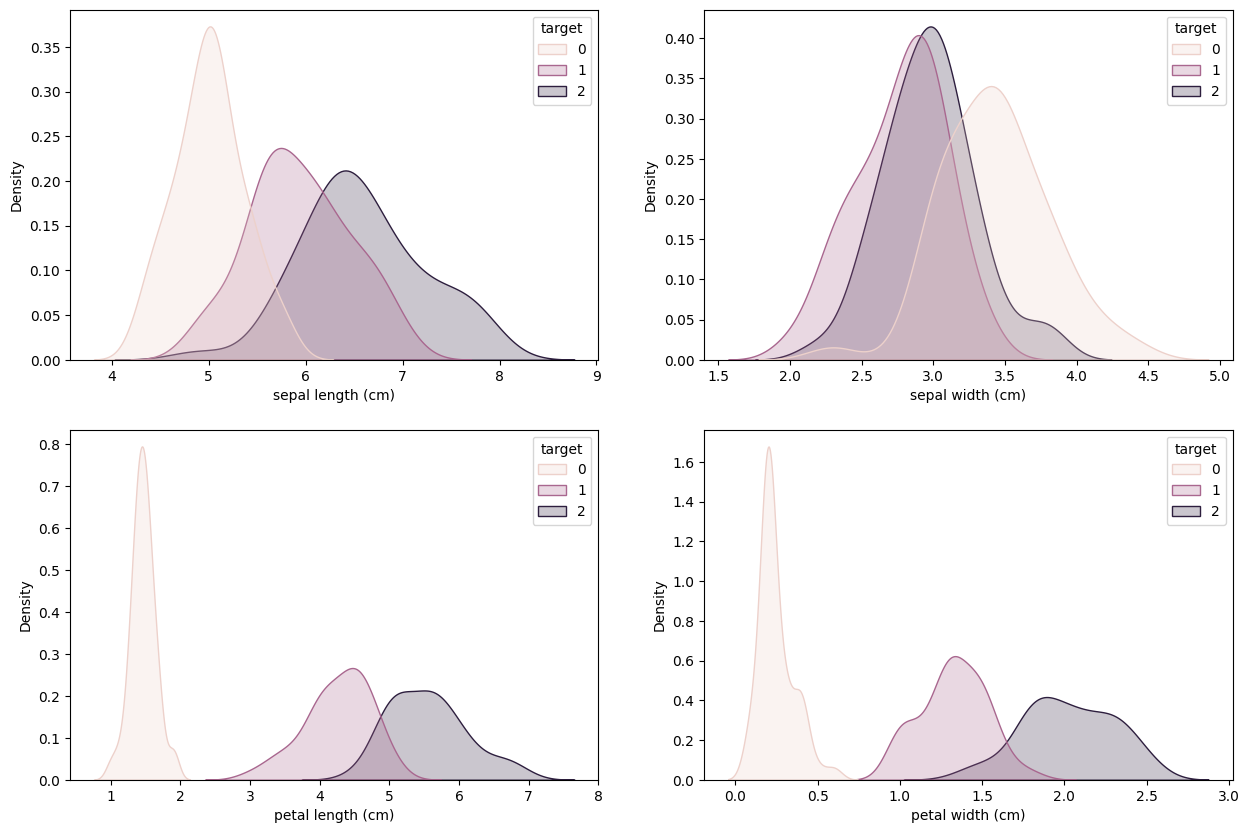

In [22]:
f, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()
for ax, feature in zip(axs, iris.feature_names):
  sns.kdeplot(df, x=feature, ax=ax, hue='target', fill=True)

Для оценки скореллированности будем использовать значение пирсоновского r

In [26]:
from itertools import combinations

pairs = list(combinations(df['target'].unique(), r=2))
result = []
for pair in pairs:
  result.append([])
  for feature in iris.feature_names:
    group_1 = df.loc[df['target'] == pair[0], feature]
    group_2 = df.loc[df['target'] == pair[1], feature]
    result[-1].append(st.pearsonr(group_1, group_2).statistic)
     

In [27]:
differences = pd.DataFrame(result, index=pairs, columns=iris.feature_names)
differences.name = differences.index.name = "Pearson's r"
differences

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Pearson's r,,,,
"(0, 1)",-0.080850,-0.143775,-0.191561,-0.176072
"(0, 2)",0.134172,0.006077,0.101951,0.077701
"(1, 2)",-0.141666,-0.086514,-0.087821,0.009845


In [28]:
def effect_size_map(differences):
  differences = np.abs(differences)
  if differences <= 0.10:
    return 'small'
  elif differences <= 0.30:
    return 'medium'
  elif differences <= 0.50:
    return 'large'
  else:
    return 'enormous'

In [29]:
differences.applymap(effect_size_map)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Pearson's r,,,,
"(0, 1)",small,medium,medium,medium
"(0, 2)",medium,small,medium,small
"(1, 2)",medium,small,small,small
